# FIT5149 S2 2019 

## Assessment 1: Predicting the Critical Temperature of a Superconductor


Student information
- Family Name: Fung
- Given Name: Wing Lun Ellena
- Student ID: 29451299
- Student email: wfun0002@student.monash.edu

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- magrittr: heatmap
- MLmetrics: calculate MSE
- caret:knn
- class :knn
- dplyr :heatmap,knn
- psych :knn
- gmodels :knn
- e1071 :knn
- FNN :knn
- rpart:decision tree
- randomForest: random forest




## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

In this assignment, it is going to provide 2 prediction models to estimate the critical temperature for conductor's propoerties. In the dataset, there are eight properties and for each property it has ten features, those will be used to develop different prediction models. This assignment will also identify the key properties for a superconductor with reasonings. 

# Part A Prediction task
## 2. Data Exploration and processing <a class="anchor" id="sec_2"></a>

In [2]:
#import data 
setwd("/Users/Ellena/Downloads")
ori_data = read.csv('train.csv')
head(ori_data)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,⋯,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,⋯,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,⋯,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,⋯,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,⋯,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,⋯,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,⋯,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23


In [2]:
#perform some data exploration by checking the summary of the data
summary(ori_data)
str(ori_data)

 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  

'data.frame':	21263 obs. of  82 variables:
 $ number_of_elements             : int  4 5 4 4 4 4 4 4 4 4 ...
 $ mean_atomic_mass               : num  88.9 92.7 88.9 88.9 88.9 ...
 $ wtd_mean_atomic_mass           : num  57.9 58.5 57.9 57.9 57.8 ...
 $ gmean_atomic_mass              : num  66.4 73.1 66.4 66.4 66.4 ...
 $ wtd_gmean_atomic_mass          : num  36.1 36.4 36.1 36.1 36.1 ...
 $ entropy_atomic_mass            : num  1.18 1.45 1.18 1.18 1.18 ...
 $ wtd_entropy_atomic_mass        : num  1.062 1.058 0.976 1.022 1.129 ...
 $ range_atomic_mass              : num  123 123 123 123 123 ...
 $ wtd_range_atomic_mass          : num  31.8 36.2 35.7 33.8 27.8 ...
 $ std_atomic_mass                : num  52 47.1 52 52 52 ...
 $ wtd_std_atomic_mass            : num  53.6 54 53.7 53.6 53.6 ...
 $ mean_fie                       : num  775 766 775 775 775 ...
 $ wtd_mean_fie                   : num  1010 1011 1011 1011 1010 ...
 $ gmean_fie                      : num  718 721 718 718 718 ...
 $

As our predicting attribute is critical temperature, let's plot a boxplot graph for this attribute

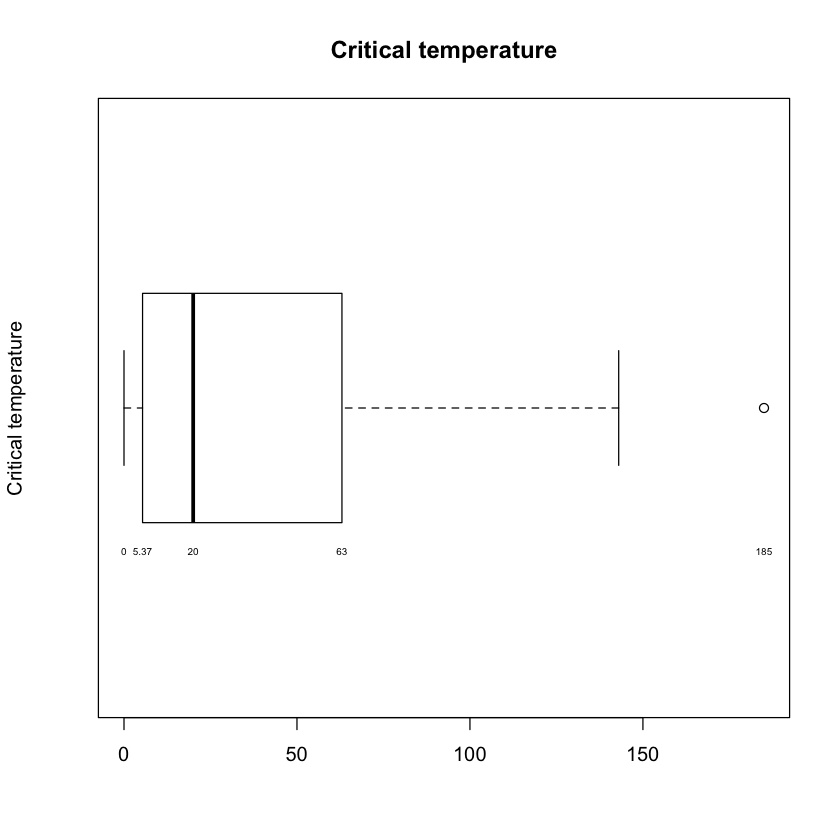

In [35]:
#create boxplot to show information about critical temperature.
boxplot(ori_data$critical_temp,data=ori_data, main="Critical temperature",
   ylab="Critical temperature",horizontal = TRUE)
text(x=fivenum(ori_data$critical_temp), labels =round(fivenum(ori_data$critical_temp),2), y=0.75,cex = 0.5)

From the box plot above we can see that critical temperature has a mean of 20, and most of the critical temperature is distributed from 5 to 63 (IQR), with an outlier of 185.

Then we want to know the correlation between varaibles.

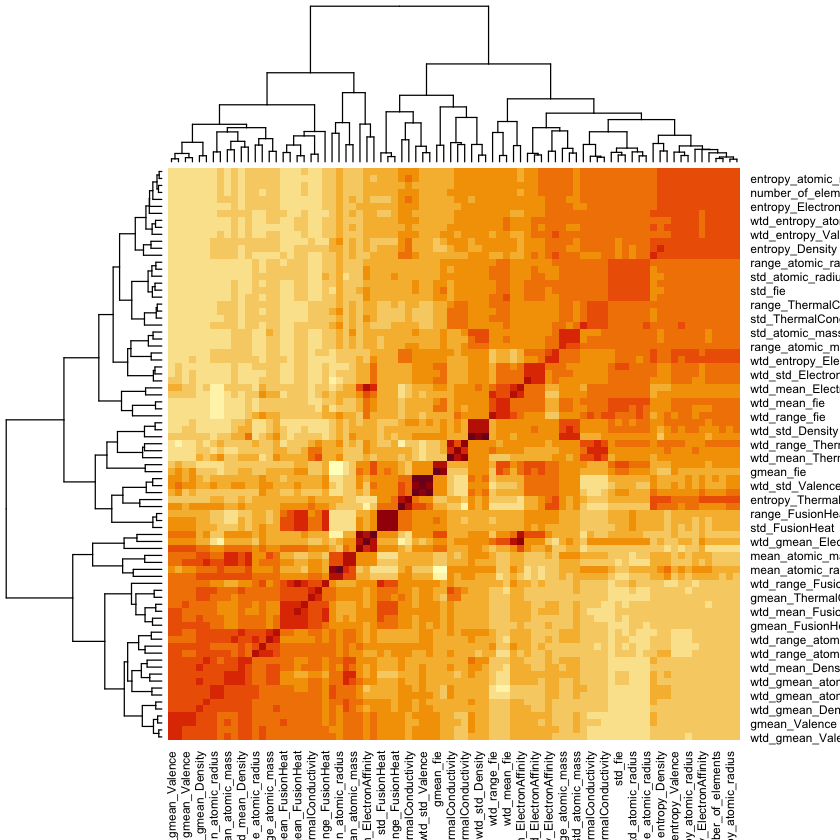

In [46]:
#use heatmap to visualise correlation between varaibles.
# install.packages("magrittr") 
# install.packages("dplyr")    
# library(magrittr) 
# library(dplyr)

ori_data %>%
  select_if(is.numeric) %>%
  cor() %>%
  heatmap()

In this heatmap, there is no any significant finding and it couldn't include all the vairables as well.
As there are too many attributes, plotting all the attributes into visualisation might not be a good method for EDA (too complicated to read), it will be better to explore the data using correlation table.

In [50]:
#show correlation between all variables
cor_df=round(cor(ori_data),2)
cor_df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,⋯,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.00,-0.14,-0.35,-0.29,-0.45,0.94,0.88,0.68,-0.32,0.51,⋯,-0.65,-0.62,-0.66,0.97,0.89,0.23,-0.45,0.11,0.04,0.60
mean_atomic_mass,-0.14,1.00,0.82,0.94,0.75,-0.10,-0.10,0.13,0.45,0.20,⋯,0.30,0.39,0.32,-0.16,-0.15,-0.11,0.17,-0.08,-0.08,-0.11
wtd_mean_atomic_mass,-0.35,0.82,1.00,0.85,0.96,-0.31,-0.41,-0.14,0.72,-0.06,⋯,0.55,0.54,0.55,-0.38,-0.33,-0.04,0.33,0.00,0.08,-0.31
gmean_atomic_mass,-0.29,0.94,0.85,1.00,0.86,-0.19,-0.23,-0.18,0.46,-0.12,⋯,0.43,0.51,0.45,-0.31,-0.31,-0.17,0.27,-0.12,-0.12,-0.23
wtd_gmean_atomic_mass,-0.45,0.75,0.96,0.86,1.00,-0.37,-0.48,-0.35,0.67,-0.27,⋯,0.61,0.61,0.62,-0.48,-0.45,-0.08,0.41,-0.03,0.03,-0.37
entropy_atomic_mass,0.94,-0.10,-0.31,-0.19,-0.37,1.00,0.89,0.54,-0.28,0.36,⋯,-0.59,-0.55,-0.59,0.96,0.86,0.20,-0.35,0.09,0.02,0.54
wtd_entropy_atomic_mass,0.88,-0.10,-0.41,-0.23,-0.48,0.89,1.00,0.62,-0.54,0.47,⋯,-0.64,-0.59,-0.65,0.90,0.92,0.16,-0.55,0.06,-0.01,0.63
range_atomic_mass,0.68,0.13,-0.14,-0.18,-0.35,0.54,0.62,1.00,-0.11,0.96,⋯,-0.47,-0.45,-0.48,0.68,0.68,0.21,-0.37,0.13,0.10,0.49
wtd_range_atomic_mass,-0.32,0.45,0.72,0.46,0.67,-0.28,-0.54,-0.11,1.00,-0.02,⋯,0.45,0.39,0.45,-0.30,-0.41,0.02,0.59,0.07,0.09,-0.34
std_atomic_mass,0.51,0.20,-0.06,-0.12,-0.27,0.36,0.47,0.96,-0.02,1.00,⋯,-0.34,-0.33,-0.35,0.52,0.54,0.19,-0.27,0.14,0.12,0.38


From this correlation table, there is no any significant finding as well, therefore, it might be better to explore the data by subsetting the data.

In [3]:
#See the correlation between features within a property
round(cor(ori_data),2)
round(cor(ori_data[2:11]),2)
round(cor(ori_data[12:21]),2)
round(cor(ori_data[22:31]),2)
round(cor(ori_data[32:41]),2)
round(cor(ori_data[42:51]),2)
round(cor(ori_data[52:61]),2)
round(cor(ori_data[62:71]),2)
round(cor(ori_data[72:81]),2)


,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass
mean_atomic_mass,1.00,0.82,0.94,0.75,-0.10,-0.10,0.13,0.45,0.20,0.13
wtd_mean_atomic_mass,0.82,1.00,0.85,0.96,-0.31,-0.41,-0.14,0.72,-0.06,-0.09
gmean_atomic_mass,0.94,0.85,1.00,0.86,-0.19,-0.23,-0.18,0.46,-0.12,-0.17
wtd_gmean_atomic_mass,0.75,0.96,0.86,1.00,-0.37,-0.48,-0.35,0.67,-0.27,-0.33
entropy_atomic_mass,-0.10,-0.31,-0.19,-0.37,1.00,0.89,0.54,-0.28,0.36,0.41
wtd_entropy_atomic_mass,-0.10,-0.41,-0.23,-0.48,0.89,1.00,0.62,-0.54,0.47,0.50
range_atomic_mass,0.13,-0.14,-0.18,-0.35,0.54,0.62,1.00,-0.11,0.96,0.92
wtd_range_atomic_mass,0.45,0.72,0.46,0.67,-0.28,-0.54,-0.11,1.00,-0.02,-0.06
std_atomic_mass,0.20,-0.06,-0.12,-0.27,0.36,0.47,0.96,-0.02,1.00,0.92
wtd_std_atomic_mass,0.13,-0.09,-0.17,-0.33,0.41,0.50,0.92,-0.06,0.92,1.00


,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie
mean_fie,1.00,0.50,0.97,0.52,0.16,0.32,0.47,-0.01,0.51,0.39
wtd_mean_fie,0.50,1.00,0.35,0.99,0.47,0.08,0.73,0.72,0.74,0.84
gmean_fie,0.97,0.35,1.00,0.39,0.02,0.24,0.25,-0.14,0.29,0.18
wtd_gmean_fie,0.52,0.99,0.39,1.00,0.41,0.03,0.66,0.71,0.68,0.77
entropy_fie,0.16,0.47,0.02,0.41,1.00,0.75,0.77,0.35,0.67,0.71
wtd_entropy_fie,0.32,0.08,0.24,0.03,0.75,1.00,0.57,-0.28,0.49,0.41
range_fie,0.47,0.73,0.25,0.66,0.77,0.57,1.00,0.45,0.98,0.94
wtd_range_fie,-0.01,0.72,-0.14,0.71,0.35,-0.28,0.45,1.00,0.46,0.58
std_fie,0.51,0.74,0.29,0.68,0.67,0.49,0.98,0.46,1.00,0.93
wtd_std_fie,0.39,0.84,0.18,0.77,0.71,0.41,0.94,0.58,0.93,1.00


,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius
mean_atomic_radius,1.00,0.41,0.92,0.32,0.02,0.01,0.01,0.13,-0.04,-0.03
wtd_mean_atomic_radius,0.41,1.00,0.62,0.98,-0.40,-0.52,-0.59,0.61,-0.60,-0.66
gmean_atomic_radius,0.92,0.62,1.00,0.59,-0.21,-0.26,-0.37,0.31,-0.42,-0.40
wtd_gmean_atomic_radius,0.32,0.98,0.59,1.00,-0.49,-0.61,-0.72,0.62,-0.72,-0.78
entropy_atomic_radius,0.02,-0.40,-0.21,-0.49,1.00,0.91,0.74,-0.31,0.61,0.68
wtd_entropy_atomic_radius,0.01,-0.52,-0.26,-0.61,0.91,1.00,0.81,-0.61,0.71,0.78
range_atomic_radius,0.01,-0.59,-0.37,-0.72,0.74,0.81,1.00,-0.49,0.97,0.96
wtd_range_atomic_radius,0.13,0.61,0.31,0.62,-0.31,-0.61,-0.49,1.00,-0.46,-0.52
std_atomic_radius,-0.04,-0.60,-0.42,-0.72,0.61,0.71,0.97,-0.46,1.00,0.94
wtd_std_atomic_radius,-0.03,-0.66,-0.40,-0.78,0.68,0.78,0.96,-0.52,0.94,1.00


,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density
mean_Density,1.00,0.87,0.89,0.82,-0.28,-0.18,0.19,0.56,0.33,0.18
wtd_mean_Density,0.87,1.00,0.88,0.94,-0.37,-0.33,0.01,0.76,0.16,0.04
gmean_Density,0.89,0.88,1.00,0.95,-0.40,-0.34,-0.18,0.54,-0.02,-0.17
wtd_gmean_Density,0.82,0.94,0.95,1.00,-0.44,-0.41,-0.22,0.68,-0.06,-0.22
entropy_Density,-0.28,-0.37,-0.40,-0.44,1.00,0.83,0.23,-0.27,0.03,0.15
wtd_entropy_Density,-0.18,-0.33,-0.34,-0.41,0.83,1.00,0.35,-0.45,0.19,0.26
range_Density,0.19,0.01,-0.18,-0.22,0.23,0.35,1.00,0.10,0.96,0.91
wtd_range_Density,0.56,0.76,0.54,0.68,-0.27,-0.45,0.10,1.00,0.22,0.10
std_Density,0.33,0.16,-0.02,-0.06,0.03,0.19,0.96,0.22,1.00,0.91
wtd_std_Density,0.18,0.04,-0.17,-0.22,0.15,0.26,0.91,0.10,0.91,1.00


,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity
mean_ElectronAffinity,1.00,0.71,0.87,0.69,0.03,0.19,0.45,0.30,0.48,0.40
wtd_mean_ElectronAffinity,0.71,1.00,0.55,0.90,0.27,0.03,0.43,0.79,0.46,0.48
gmean_ElectronAffinity,0.87,0.55,1.00,0.71,-0.07,0.06,0.02,0.12,0.04,0.00
wtd_gmean_ElectronAffinity,0.69,0.90,0.71,1.00,0.15,-0.07,0.13,0.65,0.15,0.10
entropy_ElectronAffinity,0.03,0.27,-0.07,0.15,1.00,0.74,0.39,0.25,0.27,0.34
wtd_entropy_ElectronAffinity,0.19,0.03,0.06,-0.07,0.74,1.00,0.47,-0.22,0.36,0.35
range_ElectronAffinity,0.45,0.43,0.02,0.13,0.39,0.47,1.00,0.37,0.97,0.87
wtd_range_ElectronAffinity,0.30,0.79,0.12,0.65,0.25,-0.22,0.37,1.00,0.42,0.43
std_ElectronAffinity,0.48,0.46,0.04,0.15,0.27,0.36,0.97,0.42,1.00,0.90
wtd_std_ElectronAffinity,0.40,0.48,0.00,0.10,0.34,0.35,0.87,0.43,0.90,1.00


,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat
mean_FusionHeat,1.00,0.91,0.93,0.89,-0.42,-0.39,0.66,0.68,0.71,0.67
wtd_mean_FusionHeat,0.91,1.00,0.81,0.97,-0.45,-0.49,0.63,0.88,0.71,0.66
gmean_FusionHeat,0.93,0.81,1.00,0.87,-0.39,-0.41,0.37,0.51,0.42,0.42
wtd_gmean_FusionHeat,0.89,0.97,0.87,1.00,-0.47,-0.52,0.48,0.81,0.56,0.49
entropy_FusionHeat,-0.42,-0.45,-0.39,-0.47,1.00,0.88,-0.17,-0.42,-0.28,-0.21
wtd_entropy_FusionHeat,-0.39,-0.49,-0.41,-0.52,0.88,1.00,-0.08,-0.53,-0.20,-0.15
range_FusionHeat,0.66,0.63,0.37,0.48,-0.17,-0.08,1.00,0.61,0.98,0.93
wtd_range_FusionHeat,0.68,0.88,0.51,0.81,-0.42,-0.53,0.61,1.00,0.70,0.63
std_FusionHeat,0.71,0.71,0.42,0.56,-0.28,-0.20,0.98,0.70,1.00,0.94
wtd_std_FusionHeat,0.67,0.66,0.42,0.49,-0.21,-0.15,0.93,0.63,0.94,1.00


,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity
mean_ThermalConductivity,1.00,0.70,0.35,0.24,0.04,-0.07,0.65,0.56,0.68,0.61
wtd_mean_ThermalConductivity,0.70,1.00,0.32,0.49,0.08,-0.16,0.44,0.88,0.45,0.52
gmean_ThermalConductivity,0.35,0.32,1.00,0.88,0.17,0.26,-0.42,-0.04,-0.39,-0.43
wtd_gmean_ThermalConductivity,0.24,0.49,0.88,1.00,0.12,0.16,-0.44,0.19,-0.41,-0.43
entropy_ThermalConductivity,0.04,0.08,0.17,0.12,1.00,0.76,-0.04,-0.07,-0.14,-0.07
wtd_entropy_ThermalConductivity,-0.07,-0.16,0.26,0.16,0.76,1.00,-0.26,-0.42,-0.31,-0.33
range_ThermalConductivity,0.65,0.44,-0.42,-0.44,-0.04,-0.26,1.00,0.59,0.99,0.97
wtd_range_ThermalConductivity,0.56,0.88,-0.04,0.19,-0.07,-0.42,0.59,1.00,0.61,0.68
std_ThermalConductivity,0.68,0.45,-0.39,-0.41,-0.14,-0.31,0.99,0.61,1.00,0.96
wtd_std_ThermalConductivity,0.61,0.52,-0.43,-0.43,-0.07,-0.33,0.97,0.68,0.96,1.00


,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
mean_Valence,1.00,0.94,0.99,0.94,-0.62,-0.56,0.09,0.55,0.16,0.20
wtd_mean_Valence,0.94,1.00,0.92,0.99,-0.65,-0.64,0.11,0.68,0.19,0.26
gmean_Valence,0.99,0.92,1.00,0.93,-0.62,-0.56,-0.04,0.53,0.03,0.09
wtd_gmean_Valence,0.94,0.99,0.93,1.00,-0.66,-0.65,0.03,0.68,0.11,0.17
entropy_Valence,-0.62,-0.65,-0.62,-0.66,1.00,0.91,0.16,-0.42,0.03,-0.02
wtd_entropy_Valence,-0.56,-0.64,-0.56,-0.65,0.91,1.00,0.20,-0.64,0.09,0.08
range_Valence,0.09,0.11,-0.04,0.03,0.16,0.20,1.00,0.11,0.97,0.87
wtd_range_Valence,0.55,0.68,0.53,0.68,-0.42,-0.64,0.11,1.00,0.18,0.13
std_Valence,0.16,0.19,0.03,0.11,0.03,0.09,0.97,0.18,1.00,0.89
wtd_std_Valence,0.20,0.26,0.09,0.17,-0.02,0.08,0.87,0.13,0.89,1.00


From this we can see some of the features are highly correlated within the property, for example mean and gmean are highly correlated within almost all the property, which means one of the feature might be derived from the other.
We would also want to know the correlation between vairables and the critical temperature.

In [57]:
#sort correlation of attributes from the highest to the least (either positive or negative)
sort(abs(cor_df[,82][1:81]),decreasing = T)

wtd_std_ThermalConductivity       range_ThermalConductivity 
                           0.72                            0.69 
            range_atomic_radius         std_ThermalConductivity 
                           0.65                            0.65 
        wtd_entropy_atomic_mass                wtd_mean_Valence 
                           0.63                            0.63 
              wtd_gmean_Valence              number_of_elements 
                           0.62                            0.60 
                      range_fie       wtd_entropy_atomic_radius 
                           0.60                            0.60 
          wtd_std_atomic_radius                    mean_Valence 
                           0.60                            0.60 
                entropy_Valence             wtd_entropy_Valence 
                           0.60                            0.59 
                    wtd_std_fie                     entropy_fie 
                           0.58                            0.57 
                  gmean_Valence           entropy_atomic_radius 
                           0.57                            0.56 
              std_atomic_radius          wtd_entropy_FusionHeat 
                           0.56                            0.56 
             entropy_FusionHeat             entropy_atomic_mass 
                           0.55                            0.54 
                        std_fie                   gmean_Density 
                           0.54                            0.54 
              wtd_gmean_Density               range_atomic_mass 
                           0.54                            0.49 
  wtd_range_ThermalConductivity                 entropy_Density 
                           0.47                            0.46 
       entropy_ElectronAffinity               wtd_range_Valence 
                           0.44                            0.44 
               wtd_mean_Density                gmean_FusionHeat 
                           0.43                            0.43 
           wtd_gmean_FusionHeat         wtd_gmean_atomic_radius 
                           0.43                            0.41 
                   wtd_mean_fie             wtd_entropy_Density 
                           0.40                            0.40 
                wtd_entropy_fie                 mean_FusionHeat 
                           0.39                            0.39 
            wtd_mean_FusionHeat       gmean_ThermalConductivity 
                           0.39                            0.39 
                std_atomic_mass          gmean_ElectronAffinity 
                           0.38                            0.38 
       mean_ThermalConductivity    wtd_mean_ThermalConductivity 
                           0.38                            0.38 
          wtd_gmean_atomic_mass                    mean_Density 
                           0.37                            0.37 
  wtd_gmean_ThermalConductivity             wtd_std_atomic_mass 
                           0.37                            0.36 
          wtd_range_atomic_mass                   wtd_gmean_fie 
                           0.34                            0.34 
        wtd_range_atomic_radius        wtd_std_ElectronAffinity 
                           0.34                            0.32 
           wtd_mean_atomic_mass            wtd_range_FusionHeat 
                           0.31                            0.31 
                  wtd_range_fie          wtd_mean_atomic_radius 
                           0.30                            0.30 
                wtd_std_Valence               wtd_range_Density 
                           0.30                            0.28 
         range_ElectronAffinity                   range_Density 
                           0.28                            0.26 
           std_ElectronAffinity    wtd_entropy_ElectronAffinity 
                           0.26        

From the correlation above we can see that wtd_std_ThermalConductivity is highly correlated with the critical_temp and follow with range_ThermalConductivity and range_atomic_radius. This might imply that these vairables are significant to our target.

After exploring the data, we will now split data into training and tesing data set by the ratio of 80:20, to build our predictive model.

In [5]:
#80% of the data will be training data, the other 20% will be test data
size <- floor(0.8 * nrow(ori_data))
# set seed to generate random numbers 
set.seed(123)
# Randomly identifies therows equal to sample size ( defined in previous instruction) 
#from  all the rows of Smarket dataset and stores the row number in train_ind
train_id <- sample(seq_len(nrow(ori_data)), size = size)

train <- ori_data[train_id, ]
test <- ori_data[-train_id, ]

Now we will use the data 'train' to train the prediction models.

## 3. Model Development<a class="anchor" id="sec_3"></a>

### 3.1.1 Linear regression
First we will build the most basic and commonly used predictive analysising method- linear regression to see whether the variables can predict the critical temperature accurately and which variable are more significant. 

In [6]:
#create a linear regression model with all variables
lm_model = lm(critical_temp~.,train)
#show summary for the lm model
summary(lm_model)


Call:
lm(formula = critical_temp ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.490  -9.336   0.555  10.970 170.536 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -1.840e+01  5.584e+00  -3.295 0.000986 ***
number_of_elements              -3.431e+00  8.369e-01  -4.100 4.15e-05 ***
mean_atomic_mass                 8.709e-01  9.198e-02   9.468  < 2e-16 ***
wtd_mean_atomic_mass            -9.503e-01  1.154e-01  -8.235  < 2e-16 ***
gmean_atomic_mass               -5.312e-01  9.093e-02  -5.842 5.26e-09 ***
wtd_gmean_atomic_mass            6.826e-01  1.092e-01   6.254 4.10e-10 ***
entropy_atomic_mass             -3.695e+01  5.153e+00  -7.170 7.79e-13 ***
wtd_entropy_atomic_mass          3.566e+00  4.078e+00   0.875 0.381790    
range_atomic_mass                2.040e-01  1.835e-02  11.116  < 2e-16 ***
wtd_range_atomic_mass            3.001e-02  2.484e-02   1.208 0.227008    
std_atomic_ma

The adjusted R-squared ( 𝑅2 ) value indicates this model explains 73.55% of the variation in the critical temperature.

The F-statistic 584.8 has a p-value < 2.2e-16 - so reject the null hypothesis (the model explains nothing) - the model is useful

The p-values for the coefficients show all the variables are significant at the 0.1 level.

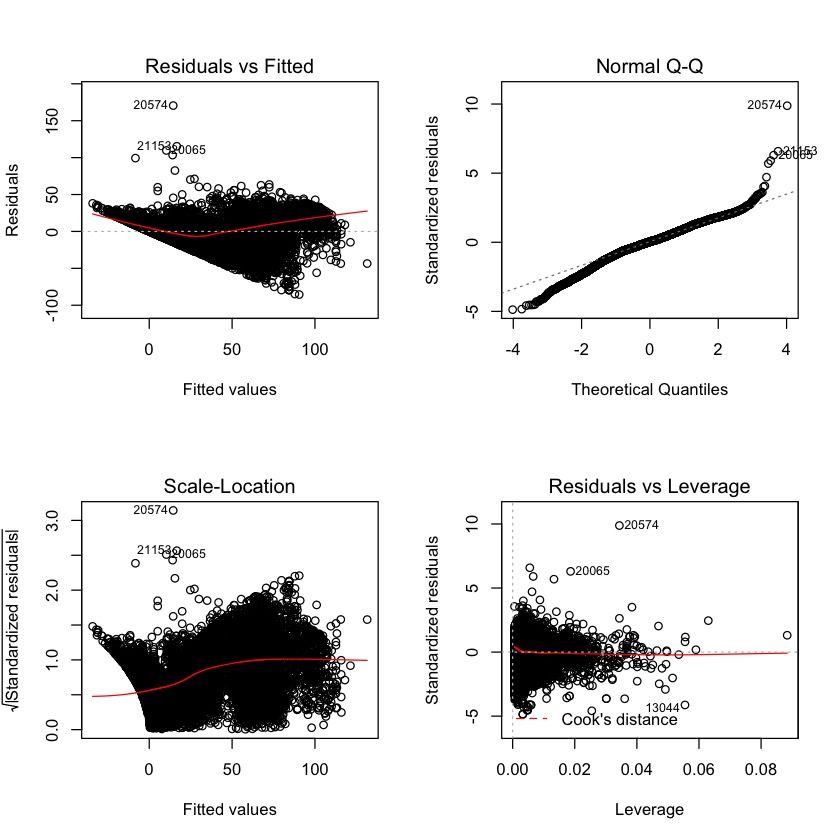

In [7]:
#plot residuals 
par(mfrow=c(2,2))
plot(lm_model)

The plots above show:
- Residual vs Fitted - shows the residuals reasonably evenly distributed around 30-40, but they funnel out as the fitted value increases. This model violates the assumption of homoscedasticity - the error terms change along the regression line
- Normal Q-Q - the residuals falling along on the dashed line, which strongly indicating the residuals are normally distributed.
- Scale-Location - From the red line we can see that the average magnitude of the standardized residual isn't changing much as the function of the fitted values as it is not almost horizontal. Also, the resisuals spread almost equally along the ranges of predictors, and a bit wider when the fitted values increase.
- Residuals vs Leverage - It looks like there is no inflential cases, due to the almost invisble cook's distance lines.

Now, we can compare the test data with the predicted value from linear regression performed above

In [8]:
#predict on test dataset
lm_predict=predict(lm_model,test)

#compute the MSE
library( MLmetrics)
lm_MSE=MSE(lm_predict, test[["critical_temp"]])


Attaching package: ‘MLmetrics’

The following object is masked from ‘package:base’:

    Recall



As we will use MSE as an indicator for the predict accuracy from different models, therefore, we will store each model's MSE in a table for later comparison.

In [9]:
#make MSE table to store MSE for different model to compare
MSE_table <- data.frame(matrix(ncol = 2, nrow = 0))
x <- c("Model", "MSE")
colnames(MSE_table) <- x
#add MSE to table
MSE_table[nrow(MSE_table) + 1,] = list("Linear regression",lm_MSE)
MSE_table

Model,MSE
<chr>,<dbl>
Linear regression,313.449


From such a high MSE we can conclude that using all the varaibles for linear regression might not be a good predictive model, as there are 8 property, we should try to find the most influencial feature from each property to build a predictive model.

### 3.1.2 linear regression with lowest p value in each property
As not all the varaibles might be significant when predicting the critical temperature, therefore, in here we will try to find the most significant feature in each property to build a predictive model

In [10]:
#find the most significant feature from each property by using p value in linear regression performed above.
atomic_mass=as.name(names(sort(summary(lm_model)$coefficients[,4][3:12])[1]))
fie=as.name(names(sort(summary(lm_model)$coefficients[,4][13:22])[1]))
atomic_radius=as.name(names(sort(summary(lm_model)$coefficients[,4][23:32])[1]))
Density=as.name(names(sort(summary(lm_model)$coefficients[,4][33:42])[1]))
ElectronAffinity=as.name(names(sort(summary(lm_model)$coefficients[,4][43:52])[1]))
FusionHeat=as.name(names(sort(summary(lm_model)$coefficients[,4][53:62])[1]))
ThermalConductivity=as.name(names(sort(summary(lm_model)$coefficients[,4][63:72])[1]))
Valence=as.name(names(sort(summary(lm_model)$coefficients[,4][73:82])[1]))

In [11]:
#build a predictive model with most significant feature with linear regression
variables= c(atomic_mass,fie,atomic_radius,Density,ElectronAffinity,FusionHeat,ThermalConductivity,Valence)
critical_temp="critical_temp"
prop8_f=as.formula(
  paste(critical_temp, 
        paste(variables, collapse = " + "), 
        sep = " ~ "))
#build a linear regression model with such varaiables
prop_8lm=lm(prop8_f,train)
summary(prop_8lm)


Call:
lm(formula = prop8_f, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-69.411 -16.013  -0.901  15.527 218.938 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -1.658e+01  1.363e+00 -12.163   <2e-16 ***
range_atomic_mass             1.027e-01  4.774e-03  21.504   <2e-16 ***
range_fie                     2.781e-02  1.136e-03  24.486   <2e-16 ***
wtd_mean_atomic_radius        1.188e-01  8.281e-03  14.349   <2e-16 ***
mean_Density                 -2.129e-03  8.319e-05 -25.593   <2e-16 ***
std_ElectronAffinity          1.881e-02  1.013e-02   1.857   0.0633 .  
wtd_entropy_FusionHeat        2.376e+01  6.728e-01  35.312   <2e-16 ***
wtd_mean_ThermalConductivity  1.509e-01  4.041e-03  37.338   <2e-16 ***
wtd_std_Valence              -2.203e+01  4.122e-01 -53.446   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.21 on 17001 degrees of freedom
M

In [12]:
#predict critical temperature with model
lm8_predict=predict(prop_8lm,test)
#calculate MSE 
lm8_MSE=MSE(lm8_predict, test[["critical_temp"]])
#add MSE to table to compare
MSE_table[nrow(MSE_table) + 1,] = list("Linear regression: 8 properties' feature with lowest p-value",lm8_MSE)
MSE_table

Model,MSE
<chr>,<dbl>
Linear regression,313.4490
Linear regression: 8 properties' feature with lowest p-value,492.8831


From this we can see that using the most significant feature from each property will not provide a more accurate model due to the highest MSE.

### 3.1.3 Linear regression with moderatly correlated variables
Now we will try to use correlation to find variables to predict critical temperature.

In [13]:
#find the correlation of each variables in train data
cor_df=cor(train[,0:no_col])
#extract variables that are moderatly-highly correlated (>0.5 either positively and negatively) with critical temp to train model 
corr_var=rownames(cor_df)[cor_df[,82] > 0.5]
critical_temp="critical_temp"
corr_f=as.formula(
  paste(critical_temp, 
        paste(corr_var, collapse = " + "), 
        sep = " ~ "))


In [14]:
#build a linear regression model with selected varaibles (high correlation with critical temperature)
corr_lm=lm(corr_f,train)
summary(corr_lm)

Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 20 in model.matrix: no columns are assigned”


Call:
lm(formula = corr_f, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.144 -12.940  -0.069  13.403 187.281 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  15.063674   1.043004  14.443  < 2e-16 ***
number_of_elements           -4.938331   0.811090  -6.089 1.16e-09 ***
entropy_atomic_mass         -52.864463   2.405471 -21.977  < 2e-16 ***
wtd_entropy_atomic_mass      45.138480   1.778568  25.379  < 2e-16 ***
entropy_fie                  24.475281  14.312793   1.710  0.08728 .  
range_fie                     0.067764   0.006722  10.081  < 2e-16 ***
std_fie                      -0.036204   0.018283  -1.980  0.04770 *  
wtd_std_fie                  -0.123449   0.008636 -14.294  < 2e-16 ***
entropy_atomic_radius       -41.720433  13.975468  -2.985  0.00284 ** 
wtd_entropy_atomic_radius   -15.473739   2.574904  -6.009 1.90e-09 ***
range_atomic_radius           0.576047   0.024689  23.332  < 2e-16 *

In [15]:
#predict temperature with the model
corr_lm_predict=predict(corr_lm,test)
#calculate MSE
corr_MSE=MSE(corr_lm_predict, test[["critical_temp"]])
#put MSE to table
MSE_table[nrow(MSE_table) + 1,] = list("Linear regression:moderatly correlated' feature",corr_MSE)
MSE_table

Warning message in predict.lm(corr_lm, test):
“prediction from a rank-deficient fit may be misleading”

Model,MSE
<chr>,<dbl>
Linear regression,313.4490
Linear regression: 8 properties' feature with lowest p-value,492.8831
Linear regression:moderatly correlated' feature,435.1487


From the MSE comparison we can see that selecting variables with correlation does not improve the prediction

### 3.1.4 Stepwise backward
As selecting vairables from correlation and the significance manually do not improve the prediction accuracy, we will perform an automatic procedures- stepwise, to select the variables based on criteria such as R^2. We will perform backward, forward and both way stepwise regression.

Stepwise backward regresison starts with all variables, by testing the deletion of each varaible using a chose model fit criterion, the deleting whose gives the most statistically insignificant deterioration of the model fit (Akaike Information Criteria), and the process will be repeated until no further variables can be deleted without a statiscally significant loss of fit.

In [16]:
#perform backward stepwise model
lm_step_back=step(lm_model)
summary(lm_step_back)


Start:  AIC=97591.27
critical_temp ~ number_of_elements + mean_atomic_mass + wtd_mean_atomic_mass + 
    gmean_atomic_mass + wtd_gmean_atomic_mass + entropy_atomic_mass + 
    wtd_entropy_atomic_mass + range_atomic_mass + wtd_range_atomic_mass + 
    std_atomic_mass + wtd_std_atomic_mass + mean_fie + wtd_mean_fie + 
    gmean_fie + wtd_gmean_fie + entropy_fie + wtd_entropy_fie + 
    range_fie + wtd_range_fie + std_fie + wtd_std_fie + mean_atomic_radius + 
    wtd_mean_atomic_radius + gmean_atomic_radius + wtd_gmean_atomic_radius + 
    entropy_atomic_radius + wtd_entropy_atomic_radius + range_atomic_radius + 
    wtd_range_atomic_radius + std_atomic_radius + wtd_std_atomic_radius + 
    mean_Density + wtd_mean_Density + gmean_Density + wtd_gmean_Density + 
    entropy_Density + wtd_entropy_Density + range_Density + wtd_range_Density + 
    std_Density + wtd_std_Density + mean_ElectronAffinity + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + entr


Call:
lm(formula = critical_temp ~ number_of_elements + mean_atomic_mass + 
    wtd_mean_atomic_mass + gmean_atomic_mass + wtd_gmean_atomic_mass + 
    entropy_atomic_mass + range_atomic_mass + std_atomic_mass + 
    wtd_std_atomic_mass + mean_fie + wtd_mean_fie + gmean_fie + 
    wtd_gmean_fie + entropy_fie + wtd_entropy_fie + range_fie + 
    wtd_range_fie + std_fie + mean_atomic_radius + wtd_mean_atomic_radius + 
    wtd_gmean_atomic_radius + entropy_atomic_radius + wtd_entropy_atomic_radius + 
    range_atomic_radius + wtd_range_atomic_radius + std_atomic_radius + 
    wtd_std_atomic_radius + mean_Density + gmean_Density + wtd_gmean_Density + 
    entropy_Density + wtd_entropy_Density + range_Density + std_Density + 
    wtd_std_Density + mean_ElectronAffinity + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + entropy_ElectronAffinity + 
    wtd_entropy_ElectronAffinity + range_ElectronAffinity + wtd_range_ElectronAffinity + 
    std_ElectronA

In [17]:
#predict on test dataset
stepback_predict=predict(lm_step_back,test)

#compute the MSE 
stepback_MSE=MSE(stepback_predict, test[["critical_temp"]])
#add MSE to table to compare
MSE_table[nrow(MSE_table) + 1,] = list("Stepwise regression: backward",stepback_MSE)
MSE_table

Model,MSE
<chr>,<dbl>
Linear regression,313.4490
Linear regression: 8 properties' feature with lowest p-value,492.8831
Linear regression:moderatly correlated' feature,435.1487
Stepwise regression: backward,313.5172


From the MSE, we can see that using stepwise backward method actually lower the accuracy of the prediction.

### 3.1.5 Stepwise forward
Forward selection starts wih no variables in the moel and by testing the addition of each variable using chosen model fit criterion, the model will only add variable whose provide statistically significant improvement for the model if added. 

In [18]:
#perform forward stepwise model
lm_step_for=step(lm_model,direction = "forward")
str(lm_step_for)

Start:  AIC=97591.27
critical_temp ~ number_of_elements + mean_atomic_mass + wtd_mean_atomic_mass + 
    gmean_atomic_mass + wtd_gmean_atomic_mass + entropy_atomic_mass + 
    wtd_entropy_atomic_mass + range_atomic_mass + wtd_range_atomic_mass + 
    std_atomic_mass + wtd_std_atomic_mass + mean_fie + wtd_mean_fie + 
    gmean_fie + wtd_gmean_fie + entropy_fie + wtd_entropy_fie + 
    range_fie + wtd_range_fie + std_fie + wtd_std_fie + mean_atomic_radius + 
    wtd_mean_atomic_radius + gmean_atomic_radius + wtd_gmean_atomic_radius + 
    entropy_atomic_radius + wtd_entropy_atomic_radius + range_atomic_radius + 
    wtd_range_atomic_radius + std_atomic_radius + wtd_std_atomic_radius + 
    mean_Density + wtd_mean_Density + gmean_Density + wtd_gmean_Density + 
    entropy_Density + wtd_entropy_Density + range_Density + wtd_range_Density + 
    std_Density + wtd_std_Density + mean_ElectronAffinity + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + entr

In [19]:
#predict on test dataset
stepfor_predict=predict(lm_step_for,test)
#calculate MSE
stepfor_MSE=MSE(stepfor_predict, test[["critical_temp"]])
#add MSE to table to compare
MSE_table[nrow(MSE_table) + 1,] = list("Stepwise regression: forward",stepfor_MSE)
MSE_table

Model,MSE
<chr>,<dbl>
Linear regression,313.4490
Linear regression: 8 properties' feature with lowest p-value,492.8831
Linear regression:moderatly correlated' feature,435.1487
Stepwise regression: backward,313.5172
Stepwise regression: forward,313.4490


From the MSE, we can see that using stepwise forward method did not improve the accuracy of the prediction from normal linear regression.

### 3.1.6 Stepwise both way
This include a combination of forward and backward stepwise regression, testing at each step of variables to be included or excluded.

In [20]:
#perform both way stepwise model
lm_step_both=step(lm_model,direction = "both")
str(lm_step_both)

Start:  AIC=97591.27
critical_temp ~ number_of_elements + mean_atomic_mass + wtd_mean_atomic_mass + 
    gmean_atomic_mass + wtd_gmean_atomic_mass + entropy_atomic_mass + 
    wtd_entropy_atomic_mass + range_atomic_mass + wtd_range_atomic_mass + 
    std_atomic_mass + wtd_std_atomic_mass + mean_fie + wtd_mean_fie + 
    gmean_fie + wtd_gmean_fie + entropy_fie + wtd_entropy_fie + 
    range_fie + wtd_range_fie + std_fie + wtd_std_fie + mean_atomic_radius + 
    wtd_mean_atomic_radius + gmean_atomic_radius + wtd_gmean_atomic_radius + 
    entropy_atomic_radius + wtd_entropy_atomic_radius + range_atomic_radius + 
    wtd_range_atomic_radius + std_atomic_radius + wtd_std_atomic_radius + 
    mean_Density + wtd_mean_Density + gmean_Density + wtd_gmean_Density + 
    entropy_Density + wtd_entropy_Density + range_Density + wtd_range_Density + 
    std_Density + wtd_std_Density + mean_ElectronAffinity + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + entr

List of 13
 $ coefficients : Named num [1:74] -17.504 -3.572 0.878 -0.936 -0.544 ...
  ..- attr(*, "names")= chr [1:74] "(Intercept)" "number_of_elements" "mean_atomic_mass" "wtd_mean_atomic_mass" ...
 $ residuals    : Named num [1:17010] 36.94 -5.61 -4.49 1.45 -18.87 ...
  ..- attr(*, "names")= chr [1:17010] "6115" "16761" "8696" "18773" ...
 $ effects      : Named num [1:17010] -4476 2672 -123 659 -254 ...
  ..- attr(*, "names")= chr [1:17010] "(Intercept)" "number_of_elements" "mean_atomic_mass" "wtd_mean_atomic_mass" ...
 $ rank         : int 74
 $ fitted.values: Named num [1:17010] 58.62 7.11 27.49 21.05 20.95 ...
  ..- attr(*, "names")= chr [1:17010] "6115" "16761" "8696" "18773" ...
 $ assign       : int [1:74] 0 1 2 3 4 5 6 7 8 9 ...
 $ qr           :List of 5
  ..$ qr   : num [1:17010, 1:74] -1.30e+02 7.67e-03 7.67e-03 7.67e-03 7.67e-03 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:17010] "6115" "16761" "8696" "18773" ...
  .. .. ..$ : chr [1:74] "(Intercept)

In [21]:
#predict on test dataset
stepboth_predict=predict(lm_step_both,test)
#calculate MSE
stepboth_MSE=MSE(stepboth_predict, test[["critical_temp"]])
#add MSE to table to compare
MSE_table[nrow(MSE_table) + 1,] = list("Stepwise regression: both way",stepboth_MSE)
MSE_table

Model,MSE
<chr>,<dbl>
Linear regression,313.4490
Linear regression: 8 properties' feature with lowest p-value,492.8831
Linear regression:moderatly correlated' feature,435.1487
Stepwise regression: backward,313.5172
Stepwise regression: forward,313.4490
Stepwise regression: both way,313.5172


From the both way stepwise regression prediction model, the MSE is 313.5, which is a bit higher than the linear regression we performed in 3.1.1.

In [22]:
#sorting models by the size of MSE
MSE_table[order(MSE_table$MSE),]

,Model,MSE
,<chr>,<dbl>
1,Linear regression,313.4490
5,Stepwise regression: forward,313.4490
4,Stepwise regression: backward,313.5172
6,Stepwise regression: both way,313.5172
3,Linear regression:moderatly correlated' feature,435.1487
2,Linear regression: 8 properties' feature with lowest p-value,492.8831


From the MSE table we can see that linear regression with all variables has the lowest MSE in linear regression.

### 3.2 K-Nearest neighbors
KNN is easy to interpret output with low calculation time but with highly competitive results. Therefore, we will use K-nn regression to output property value for the object. The value will be the average of the values of k nearest neighbors. 

In [23]:
#install or load package

library(caret)
library(class)
library(dplyr)
library(psych)
library(gmodels) 
library(e1071)
library(FNN) 



Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘caret’

The following objects are masked from ‘package:MLmetrics’:

    MAE, RMSE


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha

The following object is masked from ‘package:MLmetrics’:

    AUC


Attaching package: ‘FNN’

The following objects are masked from ‘package:class’:

    knn, knn.cv



In [24]:
#create dataset for Knn regression
#remove critical temp column out from both trainging and testing data
dat_train <- train[ ,-82]          
dat_test <- test[,-82]
#extract critical temp out for factor of true classification of dataset
cl<-train[,82]                    
testcl<-test[,82]
# knn1=knn(train = dat_train, test = dat_test, cl = cl, k=6, prob=TRUE)

As it is unclear what number of neighbours should be considered will be optimal, therefore we will use k from 1 to 100 and check the accuracy throught MSE with different number of k 

In [25]:
#create MSE table for knn method to find the which k number has the lowest RMS
Ktable <- data.frame(matrix(ncol = 2, nrow = 0))
x <- c("k", "MSE")
colnames(Ktable) <- x
# Ktable

In [26]:
#find MSE for each k number from 1 to 100
for (i in 1:100) {
knn_output=knn(train = dat_train, test = dat_test, cl = cl, k=i, prob=TRUE)
knn_output= as.double(as.character(knn_output))

Ktable[nrow(Ktable) + 1,] = list(i,MSE(knn_output, test[["critical_temp"]]))}


In [27]:
#find the number of k that has the lowest RMS
Ktable[order(Ktable$MSE),][1:10,]

k,MSE
<int>,<dbl>
1,152.2589
2,178.1590
3,235.0437
4,271.7141
5,320.9848
6,355.2016
7,371.3528
8,388.5442
9,422.7660


From the RMS calculation, it shows that when k=1, the knn prediction model has a better prediction compare to other k number within 100.

In [28]:
#add MSE to table to compare
knn_MSE=min(Ktable[,2])
MSE_table[nrow(MSE_table) + 1,] = list("KNN_K1",knn_MSE)
MSE_table

Model,MSE
<chr>,<dbl>
Linear regression,313.4490
Linear regression: 8 properties' feature with lowest p-value,492.8831
Linear regression:moderatly correlated' feature,435.1487
Stepwise regression: backward,313.5172
Stepwise regression: forward,313.4490
Stepwise regression: both way,313.5172
KNN_K1,152.2589


From the MSE of the KNN model (152.3), it shows that the prediction made from this model is more accurate compare to others.

### 3.3.1 Decision tree
Decision tree build regression model in the form of a tree strcture, it breaks down dataset into smaller subset while an associated decision tree is incrementally developed. It is an easy to use model which creates a comprehensive analysis. We will also consider random forest model later. 



In [29]:
#build decision tree predictive model with training data
library(rpart)
tree=rpart(critical_temp~., data=train, method="anova") 
tree_predict=predict(tree,test)
#calculate MSE
tree_MSE=MSE(tree_predict, test[["critical_temp"]])
#add MSE to table
MSE_table[nrow(MSE_table) + 1,] = list("Regression decision tree",tree_MSE)
MSE_table

Model,MSE
<chr>,<dbl>
Linear regression,313.4490
Linear regression: 8 properties' feature with lowest p-value,492.8831
Linear regression:moderatly correlated' feature,435.1487
Stepwise regression: backward,313.5172
Stepwise regression: forward,313.4490
Stepwise regression: both way,313.5172
KNN_K1,152.2589
Regression decision tree,342.2868


From the MSE of 342.3, we can see this is not an accurate prediction model.

### 3.3.2 Random forest
Random forest operate by constructing multitude of decision tree and output the mean prediction of the individual trees. It is a better method than decision tree, as it has a tendency of overfitting training set. As RF's runtimes are quite fast and are able to deal with unbalanced data, it might be a good predictive model for our dataset.

In [30]:
#use random forest to build a predictive model from training data
install.packages("randomForest")
library(randomForest)
random_for = randomForest(critical_temp~.,   data=train)


The downloaded binary packages are in
	/var/folders/xj/s6jx0mhd6mz37wycwtlf_w1h0000gn/T//RtmpE9wQC4/downloaded_packages


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:psych’:

    outlier

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



In [31]:
#predict on test dataset
random_predict=predict(random_for,test)
#calculate MSE
random_MSE=MSE(random_predict, test[["critical_temp"]])

#add MSE to table to compare
MSE_table[nrow(MSE_table) + 1,] = list("Random forest",random_MSE)
MSE_table

Model,MSE
<chr>,<dbl>
Linear regression,313.44901
Linear regression: 8 properties' feature with lowest p-value,492.88308
Linear regression:moderatly correlated' feature,435.14873
Stepwise regression: backward,313.51724
Stepwise regression: forward,313.44901
Stepwise regression: both way,313.51724
KNN_K1,152.25892
Regression decision tree,342.28676
Random forest,94.10166


By using a random forest predictive model, the MSE for the test data is 94.2

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

In [32]:
#sorting models by the size of MSE
# compare_model=MSE_table
MSE_table[order(MSE_table$MSE),]



,Model,MSE
,<chr>,<dbl>
9,Random forest,94.10166
7,KNN_K1,152.25892
1,Linear regression,313.44901
5,Stepwise regression: forward,313.44901
4,Stepwise regression: backward,313.51724
6,Stepwise regression: both way,313.51724
8,Regression decision tree,342.28676
3,Linear regression:moderatly correlated' feature,435.14873
2,Linear regression: 8 properties' feature with lowest p-value,492.88308


From the MSE table we can see that, by using the random forest method, it provides the the smallest MSE, thus, the most accurate prediction.

# Part B: afdaa
## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

In [33]:
#use correlation analysis, regression equations, linguistic descriptions
#EDA and stat

### 5.1 Correlation analysis
From the linear regression we performed in 3.1.3, we showed the correlation analysis of differnet attributes with critical temperature.

In [34]:
library(stringr)
corr0.5_var=rownames(cor_df)[abs(cor_df[1:81,82]) > 0.5]
# Count the number of variables for each property that is moderatly correlated (absolute value >0.5) with critical temperature
atomicmass=sum(str_count(corr0.5_var, "atomic_mass"))
no_elements=sum(str_count(corr0.5_var, "elements"))
fie=sum(str_count(corr0.5_var, "fie"))
atomicradius=sum(str_count(corr0.5_var, "atomic_radius"))
Density=sum(str_count(corr0.5_var, "Density"))
ElectronAffinity=sum(str_count(corr0.5_var, "ElectronAffinity"))
FusionHeat=sum(str_count(corr0.5_var, "FusionHeat"))
Valence=sum(str_count(corr0.5_var, "Valence"))
thermal=sum(str_count(corr0.5_var, "Thermal"))


In [35]:
#create a property name list for comparison
property_list=c("atomic mass","no_elements","fie","atomic radius","Density","Electron Affinity","Fusion Heat","Valence","thermal")
ll=c(atomicmass,no_elements,fie,atomicradius,Density,ElectronAffinity,FusionHeat,Valence,thermal)
corr_table=data.frame(Property=property_list,Count=ll)
corr_table[order(corr_table$Count,decreasing = T),]

,Property,Count
,<fct>,<int>
8,Valence,6
4,atomic radius,5
3,fie,4
9,thermal,3
1,atomic mass,2
5,Density,2
7,Fusion Heat,2
2,no_elements,1
6,Electron Affinity,0


From the correlation table we can see that property Valence has 6 features are moderatly correlated with critical temperature while automic radius and fie follow with 5 and 4 features. Also, the number of elements should be considered as siginificant, as there is only one feature, and it has almost 0.6 correlation with the critical temperature.

### 5.2 Regression equation
In 3.1.1 we built an linear regression predictive model for critical temperature with all variables, however, in this part, instead of focusing on training data, we will explore the attributes from the full dataset.


In [36]:
ori_lm=lm(critical_temp~.,ori_data)
summary(ori_lm)


Call:
lm(formula = critical_temp ~ ., data = ori_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.987  -9.370   0.595  10.976 171.246 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -2.081e+01  4.991e+00  -4.169 3.07e-05 ***
number_of_elements              -3.496e+00  7.480e-01  -4.674 2.97e-06 ***
mean_atomic_mass                 8.480e-01  8.274e-02  10.249  < 2e-16 ***
wtd_mean_atomic_mass            -9.041e-01  1.031e-01  -8.773  < 2e-16 ***
gmean_atomic_mass               -5.102e-01  8.194e-02  -6.226 4.86e-10 ***
wtd_gmean_atomic_mass            6.468e-01  9.764e-02   6.625 3.57e-11 ***
entropy_atomic_mass             -3.596e+01  4.599e+00  -7.819 5.58e-15 ***
wtd_entropy_atomic_mass          4.555e+00  3.638e+00   1.252 0.210617    
range_atomic_mass                2.142e-01  1.653e-02  12.957  < 2e-16 ***
wtd_range_atomic_mass            2.598e-02  2.208e-02   1.177 0.239203    
std_atomic

In [37]:
#extract p value from summary
ori_pvalue=summary(ori_lm)$coefficients[,4][2:82]
#put p value and variable name in a dataframe 
ori_ptable=data.frame(pvalue=ori_pvalue)
var001=rownames(ori_ptable)[ori_ptable[1]<0.01]
var0001=rownames(ori_ptable)[ori_ptable[1]<0.001]


In [38]:
#count the occurences of features that happened to have p value lower than 0.01 in each property
atomicmass1=sum(str_count(var001, "atomic_mass"))
no_elements1=sum(str_count(var001, "elements"))
fie1=sum(str_count(var001, "fie"))
atomicradius1=sum(str_count(var001, "atomic_radius"))
Density1=sum(str_count(var001, "Density"))
ElectronAffinity1=sum(str_count(var001, "ElectronAffinity"))
FusionHeat1=sum(str_count(var001, "FusionHeat"))
Valence1=sum(str_count(var001, "Valence"))
thermal1=sum(str_count(var001, "Thermal"))

In [39]:
#count the occurences of features that happened to have p value lower than 0.001 in each property
atomicmass2=sum(str_count(var0001, "atomic_mass"))
no_elements2=sum(str_count(var0001, "elements"))
fie2=sum(str_count(var0001, "fie"))
atomicradius2=sum(str_count(var0001, "atomic_radius"))
Density2=sum(str_count(var0001, "Density"))
ElectronAffinity2=sum(str_count(var0001, "ElectronAffinity"))
FusionHeat2=sum(str_count(var0001, "FusionHeat"))
Valence2=sum(str_count(var0001, "Valence"))
thermal2=sum(str_count(var0001, "Thermal"))

In [40]:
#create a property name list for comparison
property_list=c("atomic mass","no_elements","fie","atomic radius","Density","Electron Affinity","Fusion Heat","Valence","thermal")
#store count in list
p001=c(atomicmass1,no_elements1,fie1,atomicradius1,Density1,ElectronAffinity1,FusionHeat1,Valence1,thermal1)
p0001=c(atomicmass2,no_elements2,fie2,atomicradius2,Density2,ElectronAffinity2,FusionHeat2,Valence2,thermal2)
#create a p value data count to compare the significance.
pcom_table=data.frame(Property=property_list,p0.01=p001,p0.001=p0001)
# pcom_table[order(pcom_table$X0.001,decreasing = T),]

In [41]:
pcom_table=pcom_table[order(pcom_table$p0.001,decreasing = T),]
pcom_table

,Property,p0.01,p0.001
,<fct>,<int>,<int>
7,Fusion Heat,9,9
4,atomic radius,9,8
6,Electron Affinity,8,8
1,atomic mass,7,7
8,Valence,9,7
5,Density,7,6
9,thermal,7,6
3,fie,6,5
2,no_elements,1,1


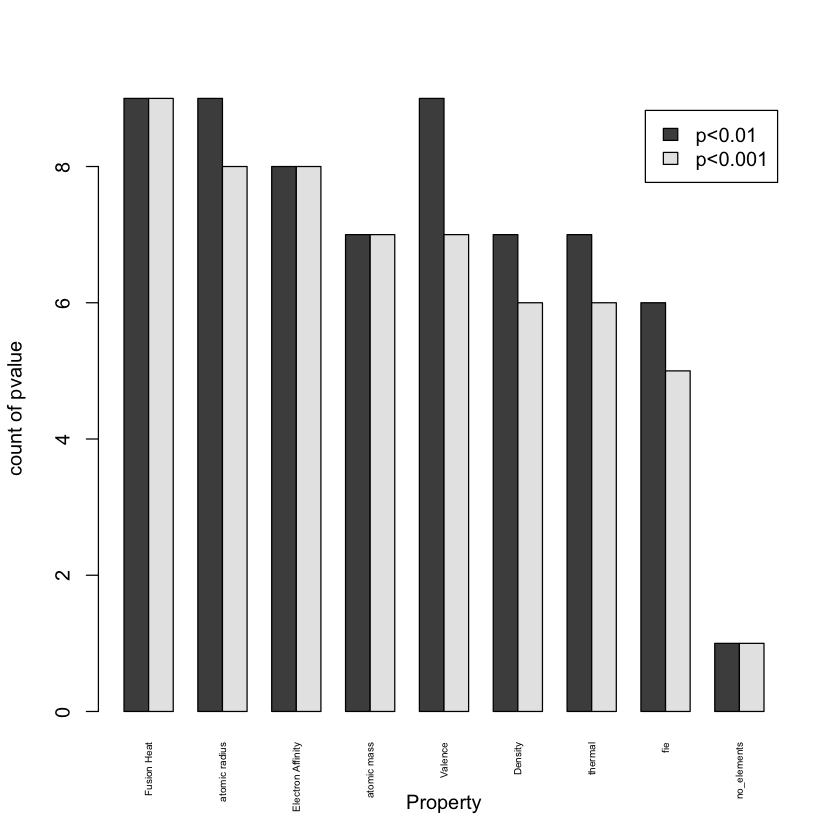

In [90]:

#show the count of features with p-value smaller than 0.01 and 0.001 in each property

test2 <- rbind(pcom_table$p0.01,pcom_table$p0.001)
bp=barplot(test2,beside=T,xlab="Property",ylab="count of pvalue",legend = c("p<0.01","p<0.001"),names.arg = pcom_table$Property,cex.names=0.5,las=3.95)


From the p-value table we can see that Fusion heat has the highest count of feature with p-value smaller than 0.001 (9 features out of 10), with atomic radius and electron affinity follow. We should omit number of elements in this analysis as there is only one feature.

### 5.3 Random forest importance
In 3.3, we performed random forest prediction, and we can find the importance of each variables using the function of 'importance()'. The value of importance is a measure of by how much removing a vairable decrease accuracy. Therefore, higher values indicate more important variables, therefore we will rank the variables by their importance and try to find which property has the highest ranking (i.e. importance) of all. 


In [53]:
#build another random forest prediction model from original dataset instead of train data 
#(as result may be differnet with different set of training data)
randomfor_ori = randomForest(critical_temp~.,   data=ori_data)
#create a data frame to store the variables' name and importance
var_name=colnames(ori_data)[1:81]

var_forest_importance=data.frame(Variables=var_name,Importance=importance(randomfor_ori))

var_forest_importance = var_forest_importance[order(var_forest_importance$IncNodePurity,decreasing=T),]
colnames(var_forest_importance)[colnames(var_forest_importance)=="IncNodePurity"] <- "Importance"
var_forest_importance

,Variables,Importance
,<fct>,<dbl>
range_ThermalConductivity,range_ThermalConductivity,4311015.5
wtd_std_ThermalConductivity,wtd_std_ThermalConductivity,3003019.3
range_atomic_radius,range_atomic_radius,2608032.6
wtd_entropy_Valence,wtd_entropy_Valence,1505082.6
std_ThermalConductivity,std_ThermalConductivity,935130.7
wtd_mean_Valence,wtd_mean_Valence,883860.3
wtd_gmean_Valence,wtd_gmean_Valence,739626.4
wtd_gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,721651.0
wtd_entropy_atomic_mass,wtd_entropy_atomic_mass,704421.1


In [54]:
#sum all the importance value and store it in a dataframe
#create object to store sum value
Thermal=0
no_ele=0
atomic_mass=0
fie=0
atomic_radius=0
Density=0
ElectronAffinity=0
FusionHeat=0
Valence=0


#store the sum value for each property
for (i in 1:81){
    #add importance value if matches key word of the property
    if (grepl("Thermal", var_forest_importance$Variables[i])==TRUE){
            Thermal=Thermal+var_forest_importance$Importance[i]
        
    }
    if (grepl("number_of_elements", var_forest_importance$Variables[i])==TRUE){
        no_ele=no_ele+var_forest_importance$Importance[i]
        
    }
    if (grepl("atomic_mass", var_forest_importance$Variables[i])==TRUE){
        atomic_mass=Thermal+var_forest_importance$Importance[i]
        
    }
    if (grepl("fie", var_forest_importance$Variables[i])==TRUE){
        fie=fie+var_forest_importance$Importance[i]
        
    }
    if (grepl("atomic_radius", var_forest_importance$Variables[i])==TRUE){
        atomic_radius=atomic_radius+var_forest_importance$Importance[i]
        
    }
    if (grepl("Density", var_forest_importance$Variables[i])==TRUE){
        Density=Density+var_forest_importance$Importance[i]
        
    }
    if (grepl("ElectronAffinity", var_forest_importance$Variables[i])==TRUE){
        ElectronAffinity=ElectronAffinity+var_forest_importance$Importance[i]
        
    }
    if (grepl("FusionHeat", var_forest_importance$Variables[i])==TRUE){
        FusionHeat=FusionHeat+var_forest_importance$Importance[i]
        
    }
    if (grepl("Valence", var_forest_importance$Variables[i])==TRUE){
        Valence=Valence+var_forest_importance$Importance[i]
        
    }
    
}


In [56]:
#create dataframe to compare which property has the highest average ranking (as number of elements only has one feature)
total_import=c(Thermal/8,no_ele,atomic_mass/8,fie/8,atomic_radius/8,Density/8,ElectronAffinity/8,FusionHeat/8,Valence/8)
Variables=c("ThermalConductivity","number_of_elements","atomic_mass","fie","atomic_radius","Density","ElectronAffinity","FusionHeat","Valence")
rank_df=data.frame(Variables=Variables,total_importance=total_import)
#sort the average importance from high to low (the higher the more important)
order_rank=rank_df[order(rank_df$total_importance,decreasing = T),]
order_rank

,Variables,total_importance
,<fct>,<dbl>
3,atomic_mass,1287859.075
1,ThermalConductivity,1282113.416
9,Valence,495273.386
5,atomic_radius,417961.716
7,ElectronAffinity,275577.874
6,Density,145455.046
4,fie,136240.087
8,FusionHeat,84263.390
2,number_of_elements,2539.987


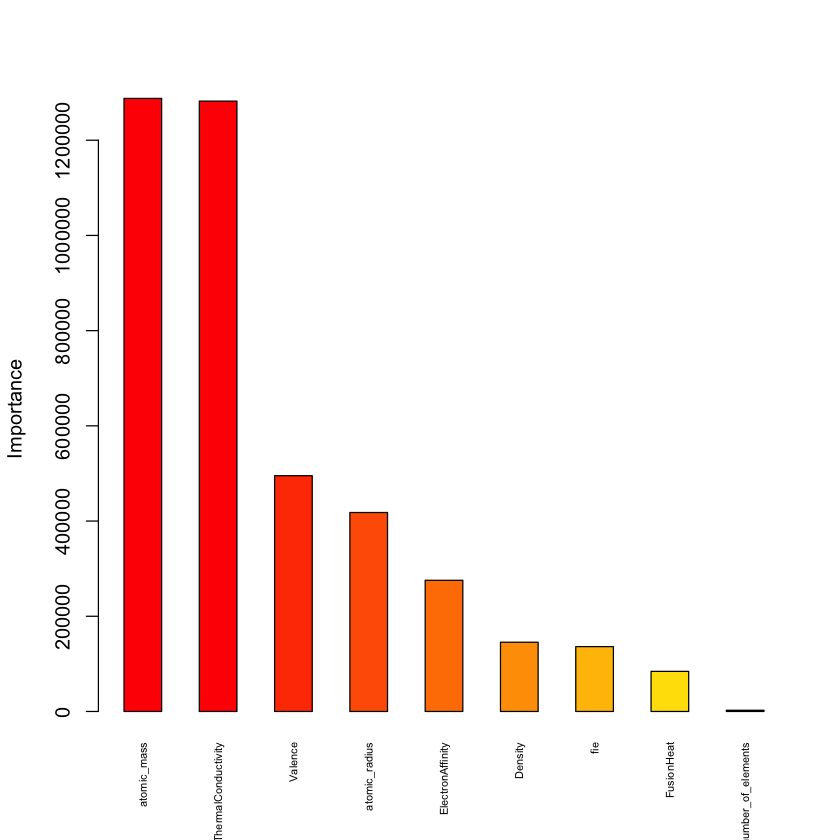

In [78]:
barplot(`colnames<-`(t(order_rank[-1]), order_rank[,1]), beside=TRUE,ylab="Importance",las=3.95,col = heat.colors(12), cex.names=0.55) 


From this importance table and the bar chart we can see that Atomic mass has the highest average importance value following closely by Thermal conductivity on the property level, which makes them the most important properties for the random forest prediction model.

## 6. Conclusion <a class="anchor" id="sec_6"></a>

In conclusion, for Part A, by using the random forest method, it provides the most accurate prediction (lowest MSE for testing dataset), therefore, should be choosen to predict the critical temperature.

For part B, as we are using the random forest prediction model, we will use- importance as an indicator for significance. Out of all the attributes, range_ThermalConductivity, wtd_std_ThermalConductivity and range_atomic_radius are the top 3 most siginificant attributes for our model. In terms of property, Thermal Conductivity has the most siginicant impact for our model and it is 2.5 time higher (importance) than the second most important property- Valence.